<a href="https://colab.research.google.com/github/Fedelberg/python_project/blob/main/medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving medical_insurance_cost_prdiction.xlsx to medical_insurance_cost_prdiction.xlsx


In [ ]:
medical_insurance_cost_prdiction = "medical_insurance_cost_prdiction.xlsx"

In [ ]:
# Read the Excel file into a pandas DataFrame
df = pd.read_excel(medical_insurance_cost_prdiction)

# Display the DataFrame
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
df.shape

(2772, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

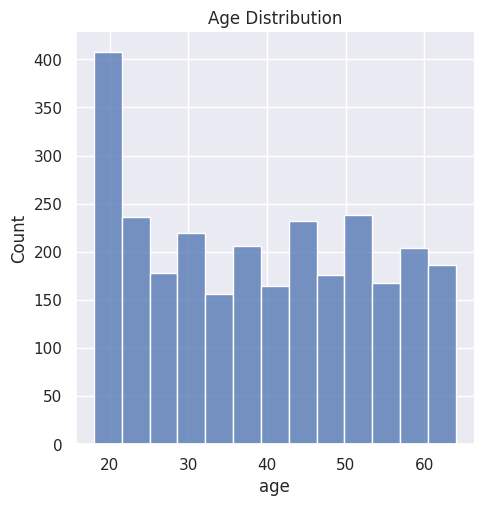

In [ ]:
#lets plot an Age Distribution
sns.set()
plt.figure(figsize = (6,6))
sns.displot(df["age"])
plt.title("Age Distribution")
plt.show();


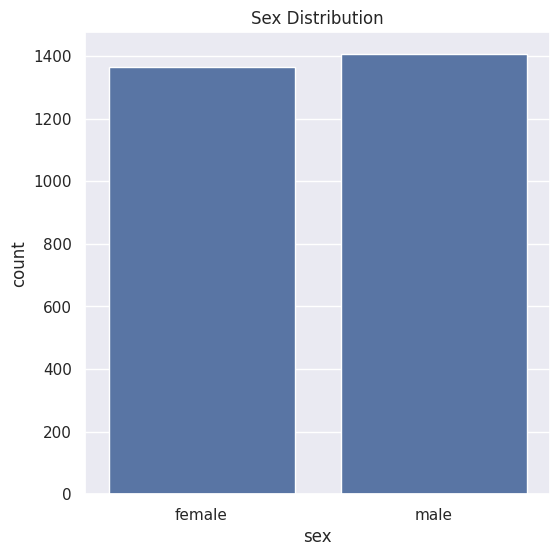

In [ ]:
#Sex Distribution
df["sex"].value_counts()

#plot
plt.figure(figsize = (6,6))
sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")
plt.show()


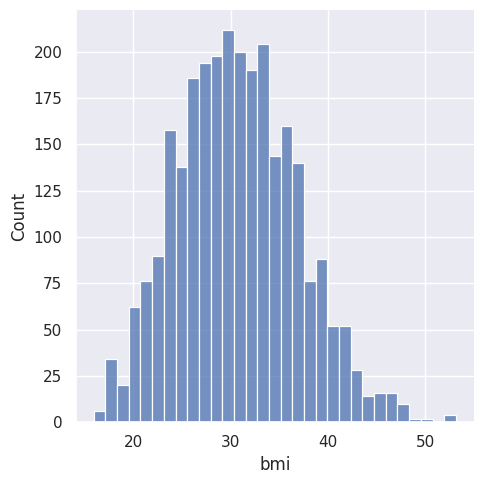

In [ ]:
#bmi Distribution
sns.displot(df["bmi"])
plt.show()

In [ ]:
#Regional
df["region"].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


In [ ]:
#data encoding
df.replace({"sex":{"male":0,"female":1}},inplace = True)
df.replace({"smoker":{"yes":0,"no":1}},inplace = True)
df.replace({"region":{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace = True)

In [ ]:
#split the the independent feature
x = df.drop(columns = "charges",axis = 1)
y = df["charges"]

print(x)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       3
2770   23    0  18.715         0       1       3
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


In [ ]:
#split the data into train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

x_train.shape


(2217, 6)

In [ ]:
x_test.shape

(555, 6)

In [ ]:
#train the model
reg = LinearRegression()

reg.fit(x_train,y_train)


LinearRegression()

In [ ]:
#prediction
training_train_prediction = reg.predict(x_train)


In [ ]:
r2_train = metrics.r2_score(y_train, training_train_prediction)

print(r2_train)

0.7505151811885781


In [ ]:
#test data prediction
test_data_prediction = reg.predict(x_test)
metrics.r2_score(y_test, test_data_prediction)

0.7491225952385041

In [ ]:
#predictor system
input_sample = (30,1,22,7,0,1)

input_data_as_np_array = np.asarray(input_sample)

input_data_reshape = input_data_as_np_array.reshape(1,-1)

# Convert the input data to a pandas DataFrame with column names
input_data_df = pd.DataFrame(input_data_reshape, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

prediction = reg.predict(input_data_df)

print("The Insurance Cost is ",prediction)

The Insurance Cost is  [29488.4931238]
